#CA1 part 1


In [1]:
#import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier


In [2]:
def print_conf_matrix(Y_test, Y_pred, title):
    conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
    print('Confusion matrix: \n', conf_mat)
    print(title +'\n')
    print('TP: ', conf_mat[1,1])
    print('TN: ', conf_mat[0,0])
    print('FP: ', conf_mat[0,1])
    print('FN: ', conf_mat[1,0])

In [3]:
# Importing dataset and examining it
dataset = pd.read_csv("Marketing.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome subscribed  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no  
(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 e

In [4]:
# Total missing values for each feature
print (dataset.isnull().sum())

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


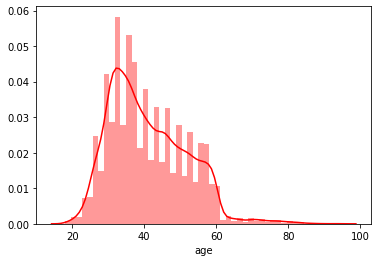

In [5]:
sns.distplot(dataset['age'], color='red')

In [6]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_marketingdata_withoutchange.html')

'corrheatmap_marketingdata_withoutchange.html'

In [7]:
# Converting Categorical features into Numerical features
dataset['subscribed'] = dataset['subscribed'].map({'yes':1, 'no':0})
dataset['month'] = dataset['month'].map({'jan':1, 'feb':2, 'mar':3,'apr':4, 'may':5,'jun':6, 'jul':7, 'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
dataset['loan'] = dataset['loan'].map({'yes':1, 'no':0})
dataset['default'] = dataset['default'].map({'yes':1, 'no':0})
dataset['housing'] = dataset['housing'].map({'yes':1, 'no':0})

categorical_features = ['contact', 'marital', 'education', 'job', 'poutcome']
dataset = pd.get_dummies(dataset, columns = categorical_features)


# Defining pdays
def converter(column):
    if column < 0:
        return 0 # never contacted
    elif column > 0 and column < 40:
        return 1 # contacted
    else:
        return 2 #contacted long back
dataset['pdays'] = dataset['pdays'].apply(converter)


print(dataset.head())
print(dataset.tail())

   age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  ...  job_self-employed  job_services  job_student  job_technician  \
0      0  ...                  0             0            0               0   
1      0  ...                  0             0            0               1   
2      0  ...                  0             0            0               0   
3      0  ...                  0             0            0               0   
4      0  ...                  0             0            0               0   

   job_unemployed  job_unknown  poutcome_failure  poutcome_other  \
0     

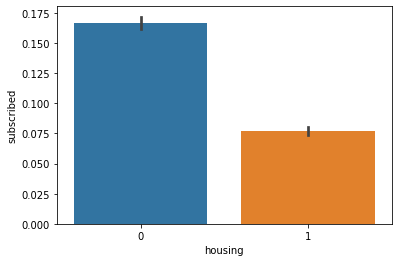

In [8]:
sns.barplot(x="housing", y="subscribed", data=dataset);

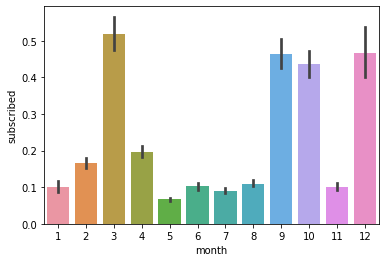

In [9]:
sns.barplot(x="month", y="subscribed", data=dataset);

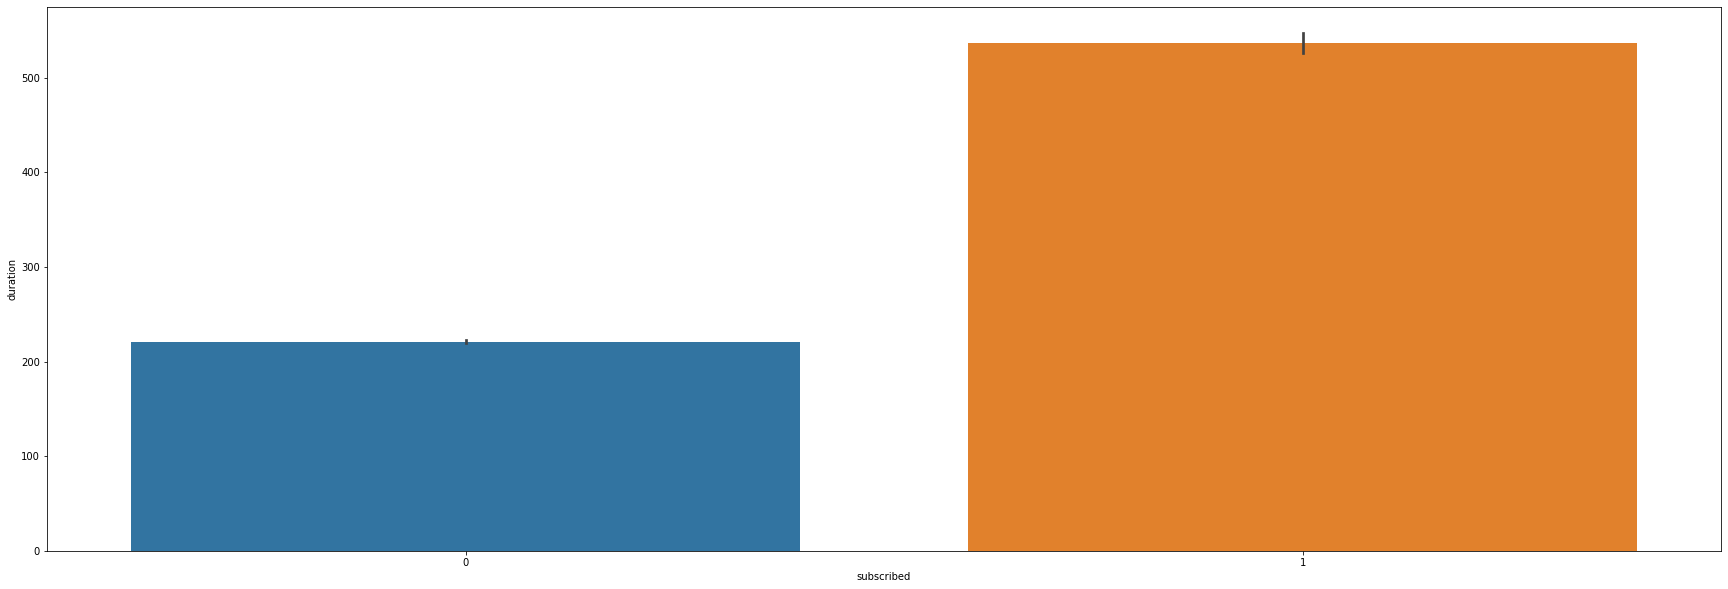

In [10]:
plt.figure(figsize=(30, 10))
sns.barplot(x="subscribed", y="duration", data=dataset);

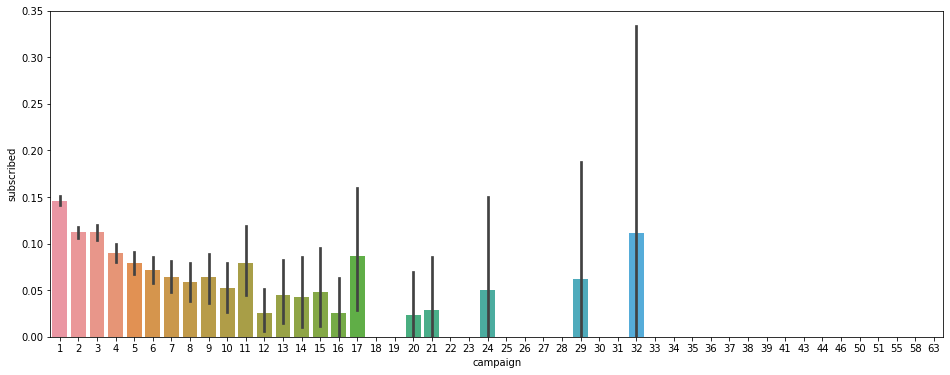

In [10]:
plt.figure(figsize=(16, 6))
sns.barplot(x="campaign", y="subscribed", data=dataset);

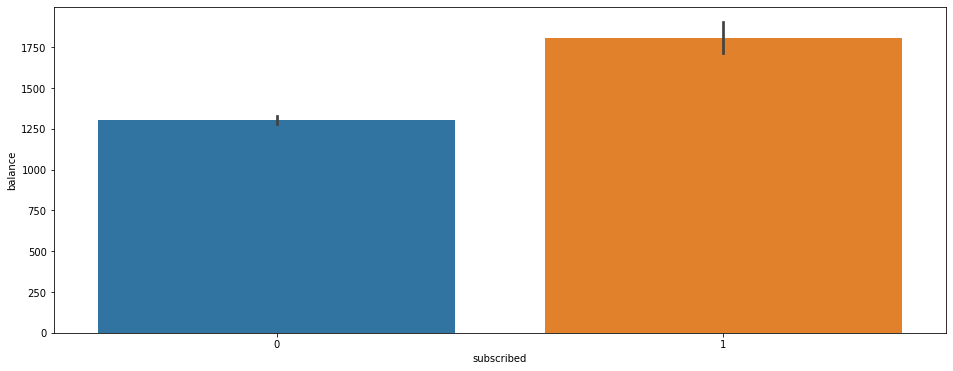

In [11]:
plt.figure(figsize=(16, 6))
sns.barplot(x="subscribed", y="balance", data=dataset);

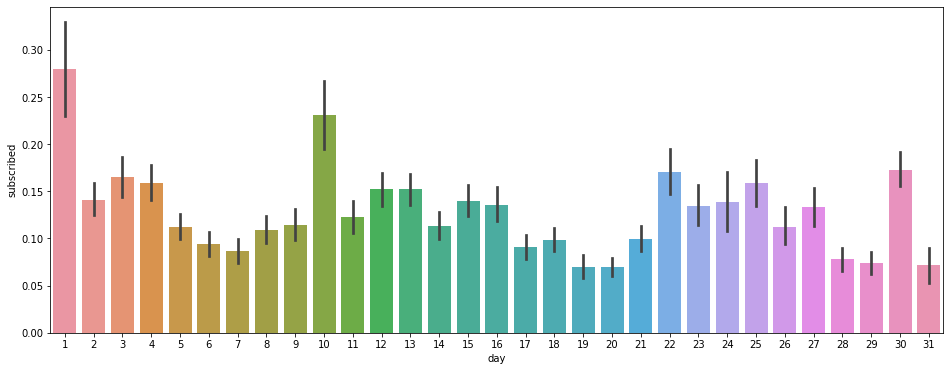

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(x="day", y="subscribed", data=dataset);

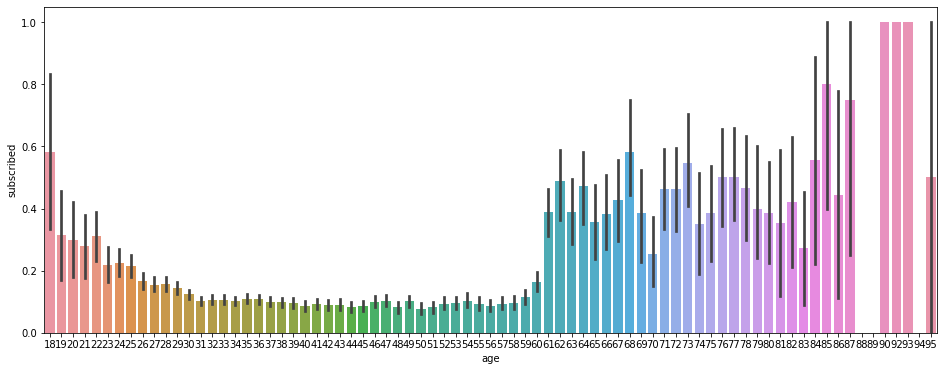

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(x="age", y="subscribed", data=dataset);

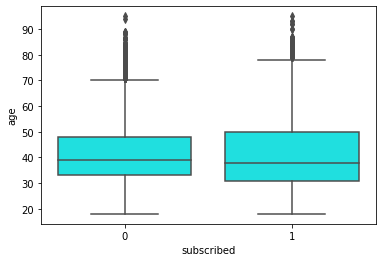

In [14]:
sns.boxplot(x="subscribed", y="age", data=dataset, color ='cyan');

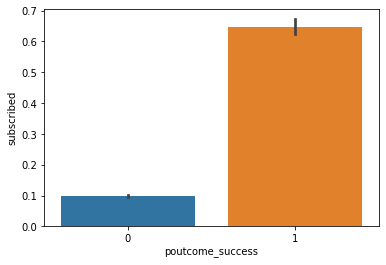

In [15]:

sns.barplot(x="poutcome_success", y="subscribed", data=dataset);

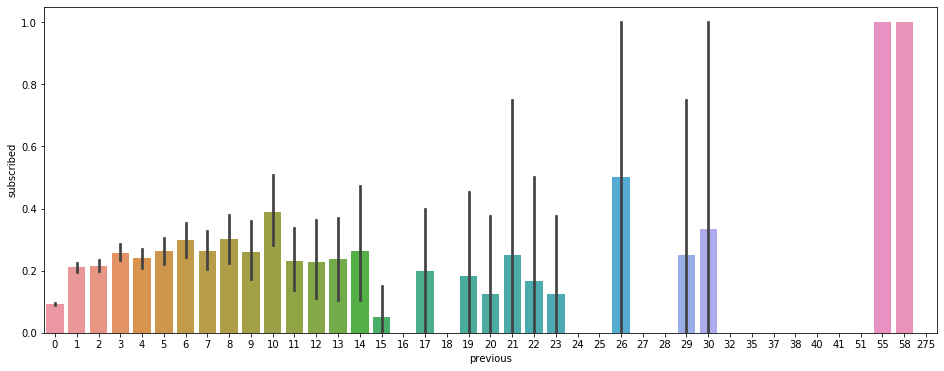

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(x="previous", y="subscribed", data=dataset);

In [ ]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_marketingdata.html')

In [11]:
#drop p_outcome_unknown and p_out _other since both of them dont give any significant outcome. we only look for suceess failure for our model.

dataset = dataset.drop(['poutcome_unknown'],axis=1)

dataset = dataset.drop(['poutcome_other'],axis=1)

#already removed. hence the below err.

In [12]:
#removing contact unknown as well since it seems to be of no use.
dataset = dataset.drop(['contact_unknown'],axis=1)

In [13]:
# Dividing dataset into label and feature sets
X = dataset.drop(['subscribed'], axis = 1) # Features
Y = dataset['subscribed'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)
print(dataset)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(45211, 34)
(45211,)
       age  default  balance  housing  loan  day  month  duration  campaign  \
0       58        0     2143        1     0    5      5       261         1   
1       44        0       29        1     0    5      5       151         1   
2       33        0        2        1     1    5      5        76         1   
3       47        0     1506        1     0    5      5        92         1   
4       33        0        1        0     0    5      5       198         1   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
45206   51        0      825        0     0   17     11       977         3   
45207   71        0     1729        0     0   17     11       456         2   
45208   72        0     5715        0     0   17     11      1127         5   
45209   57        0      668        0     0   17     11       508         4   
45210   37        0     2971        

In [14]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [15]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(33908, 34)
(11303, 34)


In [16]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling TEchnique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())


Number of observations in each class before oversampling (training data): 
 0    29928
1     3980
Name: subscribed, dtype: int64


In [17]:
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())


Number of observations in each class after oversampling (training data): 
 1    29928
0    29928
Name: subscribed, dtype: int64


In [24]:
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)

"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'n_estimators': 450}
0.9624788164865891


In [18]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=450, criterion='entropy', max_features='auto', random_state=12)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_test)
print_conf_matrix(Y_test,Y_pred,'initial')


duration               0.289514
month                  0.103025
campaign               0.089449
balance                0.072416
age                    0.066279
day                    0.065271
housing                0.055984
contact_cellular       0.043315
poutcome_success       0.035062
previous               0.030257
loan                   0.016416
pdays                  0.014464
education_tertiary     0.009841
marital_married        0.009643
education_secondary    0.009468
marital_single         0.008810
contact_telephone      0.008112
job_blue-collar        0.007827
job_technician         0.007281
job_management         0.007011
poutcome_failure       0.006740
education_primary      0.006246
job_admin.             0.006118
marital_divorced       0.005056
job_services           0.004607
job_retired            0.004058
job_student            0.003071
education_unknown      0.002954
job_self-employed      0.002879
job_unemployed         0.002767
job_entrepreneur       0.002557
job_hous

In [26]:
# Selecting features with higher sifnificance and redefining feature set
X_subset1 = dataset[['duration', 'month', 'campaign', 'balance','day','age','housing','contact_cellular']]
#,'contact','job','education']]

print(X_subset1)

feature_scaler = StandardScaler()
X_subset1 = feature_scaler.fit_transform(X_subset1)

# Dividing dataset into training and test sets
X_train_sub, X_test_sub, Y_train_sub, Y_test_sub = train_test_split( X_subset1, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train_sub,Y_train_sub = smote.fit_sample(X_train_sub,Y_train_sub)



       duration  month  campaign  balance  day  age  housing  contact_cellular
0           261      5         1     2143    5   58        1                 0
1           151      5         1       29    5   44        1                 0
2            76      5         1        2    5   33        1                 0
3            92      5         1     1506    5   47        1                 0
4           198      5         1        1    5   33        0                 0
...         ...    ...       ...      ...  ...  ...      ...               ...
45206       977     11         3      825   17   51        0                 1
45207       456     11         2     1729   17   71        0                 1
45208      1127     11         5     5715   17   72        0                 1
45209       508     11         4      668   17   57        0                 0
45210       361     11         2     2971   17   37        0                 1

[45211 rows x 8 columns]


In [27]:
rfc = RandomForestClassifier(n_estimators=450, criterion='entropy', max_features='auto', random_state=12)
rfc.fit(X_train_sub,Y_train_sub)

Y_pred_sub = rfc.predict(X_test_sub)
print_conf_matrix(Y_test_sub,Y_pred_sub,'subset')


Confusion matrix: 
 [[9231  763]
 [ 479  830]]
TP:  830
TN:  9231
FP:  763
FN:  479


In [ ]:

100 ----



75

25 --- TN TP FN FP



-- feature imp 
-- colunm

data


Y

25--- model 


TP TN FN FP 




In [28]:
# Selecting features with higher sifnificance and redefining feature set with 1 less param
X_subset2 = dataset[['duration', 'month', 'campaign', 'balance','day','age','housing']]
#,'contact','job','education']]

print(X_subset2)

feature_scaler = StandardScaler()
X_subset2 = feature_scaler.fit_transform(X_subset2)

# Dividing dataset into training and test sets
X_train_sub2, X_test_sub2, Y_train_sub2, Y_test_sub2 = train_test_split( X_subset2, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train_sub2,Y_train_sub2 = smote.fit_sample(X_train_sub2,Y_train_sub2)

rfc = RandomForestClassifier(n_estimators=450, criterion='entropy', max_features='auto', random_state=12)
rfc.fit(X_train_sub2,Y_train_sub2)

Y_pred_sub2 = rfc.predict(X_test_sub2)
print_conf_matrix(Y_test_sub2,Y_pred_sub2,'subset2')


       duration  month  campaign  balance  day  age  housing
0           261      5         1     2143    5   58        1
1           151      5         1       29    5   44        1
2            76      5         1        2    5   33        1
3            92      5         1     1506    5   47        1
4           198      5         1        1    5   33        0
...         ...    ...       ...      ...  ...  ...      ...
45206       977     11         3      825   17   51        0
45207       456     11         2     1729   17   71        0
45208      1127     11         5     5715   17   72        0
45209       508     11         4      668   17   57        0
45210       361     11         2     2971   17   37        0

[45211 rows x 7 columns]
Confusion matrix: 
 [[9209  785]
 [ 492  817]]
TP:  817
TN:  9209
FP:  785
FN:  492


In [29]:
# Selecting features with higher sifnificance and redefining feature set with 1 more  param
X_subset3 = dataset[['duration', 'month', 'campaign', 'balance','day','age','housing','contact_cellular','poutcome_success']]
#,'contact','job','education']]

print(X_subset3)

feature_scaler = StandardScaler()
X_subset3 = feature_scaler.fit_transform(X_subset3)

# Dividing dataset into training and test sets
X_train_sub3, X_test_sub3, Y_train_sub3, Y_test_sub3 = train_test_split( X_subset3, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train_sub3,Y_train_sub3 = smote.fit_sample(X_train_sub3,Y_train_sub3)

rfc = RandomForestClassifier(n_estimators=450, criterion='entropy', max_features='auto', random_state=12)
rfc.fit(X_train_sub3,Y_train_sub3)

Y_pred_sub3 = rfc.predict(X_test_sub3)
print_conf_matrix(Y_test_sub3,Y_pred_sub3,'subset3')


       duration  month  campaign  balance  day  age  housing  \
0           261      5         1     2143    5   58        1   
1           151      5         1       29    5   44        1   
2            76      5         1        2    5   33        1   
3            92      5         1     1506    5   47        1   
4           198      5         1        1    5   33        0   
...         ...    ...       ...      ...  ...  ...      ...   
45206       977     11         3      825   17   51        0   
45207       456     11         2     1729   17   71        0   
45208      1127     11         5     5715   17   72        0   
45209       508     11         4      668   17   57        0   
45210       361     11         2     2971   17   37        0   

       contact_cellular  poutcome_success  
0                     0                 0  
1                     0                 0  
2                     0                 0  
3                     0                 0  
4          

In [30]:
# Selecting features with higher sifnificance and redefining feature set with 1 more  param
X_subset4 = dataset[['duration', 'month', 'campaign', 'balance','day','age','housing','contact_cellular','poutcome_success','previous']]
#,'contact','job','education']]

print(X_subset4)

feature_scaler = StandardScaler()
X_subset4 = feature_scaler.fit_transform(X_subset4)

# Dividing dataset into training and test sets
X_train_sub4, X_test_sub4, Y_train_sub4, Y_test_sub4 = train_test_split( X_subset4, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train_sub4,Y_train_sub4 = smote.fit_sample(X_train_sub4,Y_train_sub4)

rfc = RandomForestClassifier(n_estimators=450, criterion='entropy', max_features='auto', random_state=12)
rfc.fit(X_train_sub4,Y_train_sub4)

Y_pred_sub4 = rfc.predict(X_test_sub4)
print_conf_matrix(Y_test_sub4,Y_pred_sub4,'subset4')


       duration  month  campaign  balance  day  age  housing  \
0           261      5         1     2143    5   58        1   
1           151      5         1       29    5   44        1   
2            76      5         1        2    5   33        1   
3            92      5         1     1506    5   47        1   
4           198      5         1        1    5   33        0   
...         ...    ...       ...      ...  ...  ...      ...   
45206       977     11         3      825   17   51        0   
45207       456     11         2     1729   17   71        0   
45208      1127     11         5     5715   17   72        0   
45209       508     11         4      668   17   57        0   
45210       361     11         2     2971   17   37        0   

       contact_cellular  poutcome_success  previous  
0                     0                 0         0  
1                     0                 0         0  
2                     0                 0         0  
3              